In [11]:
import os, shutil

In [12]:
os.getcwd()

'/home/parmardiwakar150/Downloads/dl_challange'

In [13]:
original_dataset_dir = os.path.join(os.getcwd(), 'train')

In [14]:
original_dataset_dir

'/home/parmardiwakar150/Downloads/dl_challange/train'

In [15]:
base_dir = os.path.join(os.getcwd(), 'Dataset')

In [16]:
base_dir

'/home/parmardiwakar150/Downloads/dl_challange/Dataset'

In [17]:
train_dir = os.path.join(base_dir, 'train')

In [18]:
train_dir

'/home/parmardiwakar150/Downloads/dl_challange/Dataset/train'

In [16]:
os.mkdir(train_dir)

In [19]:
validation_dir = os.path.join(base_dir, 'validation')

In [18]:
os.mkdir(validation_dir)

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [22]:
file_names = list(train.Image_id.values)

In [23]:
label_names = list(train.Animal.values)

In [24]:
folders_to_be_created = np.unique(label_names)

In [25]:
for new_path in folders_to_be_created:
    if not os.path.exists(os.path.join(train_dir, new_path)):
        os.makedirs(os.path.join(train_dir, new_path))

In [26]:
for new_path in folders_to_be_created:
    if not os.path.exists(os.path.join(validation_dir, new_path)):
        os.makedirs(os.path.join(validation_dir, new_path))

In [27]:
for f in range(12000):
    current_image = file_names[f]
    current_label = label_names[f]
    src = os.path.join(original_dataset_dir, current_image)
    dst = os.path.join(train_dir, current_label)
    shutil.move(src, dst) 

In [28]:
for f in range(12000, 13000):
    current_image = file_names[f]
    current_label = label_names[f]
    src = os.path.join(original_dataset_dir, current_image)
    dst = os.path.join(validation_dir, current_label)
    shutil.move(src, dst) 

In [29]:
from keras.applications import ResNet50

/home/parmardiwakar150/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
sz=224
batch_size=64

In [32]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense

from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [37]:
train_data_dir = train_dir
validation_data_dir = validation_dir

In [38]:
train_data_dir

'/home/parmardiwakar150/Downloads/dl_challange/Dataset/train'

In [39]:
validation_data_dir

'/home/parmardiwakar150/Downloads/dl_challange/Dataset/validation'

In [40]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

Found 12000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


In [46]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [47]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [48]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(30, activation='softmax')(x)

In [49]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=5, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/5
187/187 [==============================] - 5957s 32s/step - loss: 1.3767 - acc: 0.6712 - val_loss: 3.8852 - val_acc: 0.0323
Epoch 2/5
 39/187 [=====>........................] - ETA: 1:14:09 - loss: 0.6235 - acc: 0.8069

KeyboardInterrupt: 

In [74]:
!ls {train_dir}/antelope | head

Img-10000.jpg
Img-10010.jpg
Img-10016.jpg
Img-10017.jpg
Img-10039.jpg
Img-10054.jpg
Img-10066.jpg
Img-10116.jpg
Img-10175.jpg
Img-10195.jpg
ls: write error: Broken pipe


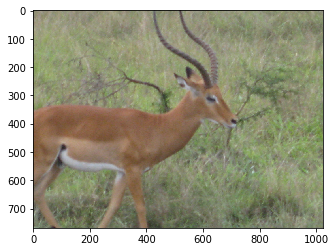

In [75]:
img = plt.imread(f'{train_dir}/antelope/Img-10000.jpg')
plt.imshow(img)

In [76]:
img.shape

(768, 1024, 3)

In [78]:
img[:4,:4]

array([[[130, 132, 108],
        [129, 131, 110],
        [130, 131, 115],
        [135, 133, 121]],

       [[134, 132, 111],
        [134, 131, 112],
        [134, 131, 116],
        [134, 132, 119]],

       [[135, 129, 113],
        [137, 131, 115],
        [137, 131, 115],
        [135, 132, 115]],

       [[133, 130, 115],
        [135, 132, 115],
        [137, 134, 117],
        [137, 134, 115]]], dtype=uint8)

In [80]:
img[:1].shape

(1, 1024, 3)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
os.getcwd()

'/home/parmardiwakar150/Downloads/dl_challange'

In [5]:
path = os.path.join(os.getcwd(), 'Dataset')

In [6]:
path

'/home/parmardiwakar150/Downloads/dl_challange/Dataset'

In [7]:
sz=224
arch=resnet34

In [8]:
data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))

In [9]:
data

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
#learn.fit(0.01, 250)#56 was best

In [11]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 87%|████████▋ | 321/370 [01:29<00:13,  3.60it/s, loss=4.09] 

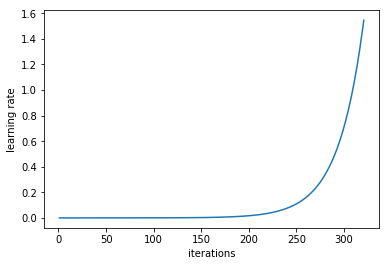

In [12]:
learn.sched.plot_lr()

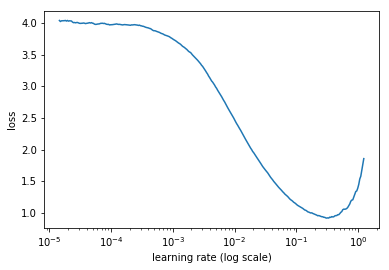

In [13]:
learn.sched.plot()

In [10]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [11]:
def get_augs():
    data = ImageClassifierData.from_paths(path, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [12]:
ims = np.stack([get_augs() for i in range(6)])

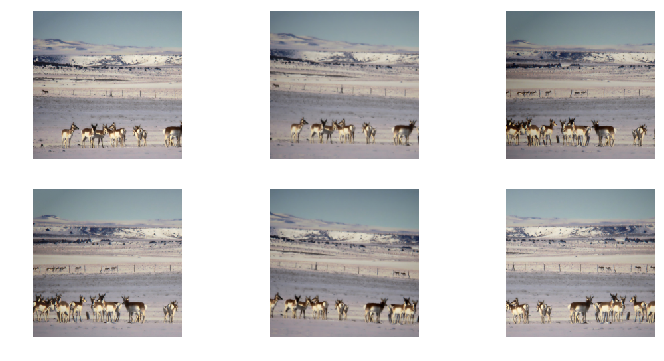

In [13]:
plots(ims, rows=2)

In [14]:
data = ImageClassifierData.from_paths(path, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [16]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.357715   0.271864   0.919     



[array([0.27186]), 0.919]

In [20]:
learn.precompute=False

In [21]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.340725   0.25011    0.923     
    1      0.297624   0.230554   0.933                         
    2      0.270859   0.23139    0.931                           


[array([0.23139]), 0.931]

In [15]:
learn.load('224_lastlayer')

RuntimeError: While copying the parameter named 0.weight, whose dimensions in the model are torch.Size([1024]) and whose dimensions in the checkpoint are torch.Size([64, 3, 7, 7]).

In [67]:
from keras.preprocessing.image import load_img, img_to_array

/home/parmardiwakar150/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [68]:
img = load_img('/home/parmardiwakar150/Downloads/dl_challange/Dataset/train/siamese+cat/Img-9912 (copy).jpg',
               target_size=(sz, sz))

FileNotFoundError: [Errno 2] No such file or directory: '/home/parmardiwakar150/Downloads/dl_challange/Dataset/train/siamese+cat/Img-9912 (copy).jpg'

In [69]:
import matplotlib.pyplot as plt

In [70]:
plt.imshow(img)

NameError: name 'img' is not defined

In [22]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)

In [23]:
im = val_tfms(open_image('/home/parmardiwakar150/Downloads/dl_challange/Dataset/valid/wolf/Img-12135.jpg'))

In [24]:
im.shape

(3, 224, 224)

In [25]:
im[None].shape

(1, 3, 224, 224)

In [26]:
learn.precompute=False

In [27]:
preds = learn.predict_array(im[None])

In [28]:
preds

array([[-11.08008, -12.53693, -12.85383,  -8.38657, -12.16107, -11.98602, -11.03333,  -7.96249, -10.61827,
         -8.26223,  -5.32815, -13.7968 ,  -9.7022 , -11.67299, -13.1209 ,  -7.31581, -12.50118, -10.29231,
        -11.08727, -10.87508,  -9.25798, -14.26583,  -9.705  , -11.12464, -12.6342 , -11.87232, -11.02103,
        -11.72   , -12.99361,  -0.0068 ]], dtype=float32)

In [29]:
preds.reshape(30,)

array([-11.08008, -12.53693, -12.85383,  -8.38657, -12.16107, -11.98602, -11.03333,  -7.96249, -10.61827,
        -8.26223,  -5.32815, -13.7968 ,  -9.7022 , -11.67299, -13.1209 ,  -7.31581, -12.50118, -10.29231,
       -11.08727, -10.87508,  -9.25798, -14.26583,  -9.705  , -11.12464, -12.6342 , -11.87232, -11.02103,
       -11.72   , -12.99361,  -0.0068 ], dtype=float32)

In [30]:
np.argmax(preds)

29

In [31]:
np.exp(preds.reshape(30,))

array([0.00002, 0.     , 0.     , 0.00023, 0.00001, 0.00001, 0.00002, 0.00035, 0.00002, 0.00026, 0.00485,
       0.     , 0.00006, 0.00001, 0.     , 0.00066, 0.     , 0.00003, 0.00002, 0.00002, 0.0001 , 0.     ,
       0.00006, 0.00001, 0.     , 0.00001, 0.00002, 0.00001, 0.     , 0.99322], dtype=float32)

In [32]:
predictions = []

In [33]:
for i in range(1,6001):
    im = val_tfms(open_image(os.path.join(os.getcwd(), f'test/Img-{i}.jpg')))
    preds = learn.predict_array(im[None])
    predictions.append(np.exp(preds.reshape(30,)))

In [34]:
prediction = pd.DataFrame(np.array(predictions).reshape(6000, 30))

In [35]:
prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000002,4.406103e-07,0.000005,0.000003,0.997383,2.084806e-07,0.000001,0.000001,5.827254e-07,0.000005,...,2.982729e-07,1.621876e-07,0.000088,1.654128e-07,0.000003,5.766509e-07,2.764451e-07,0.000004,5.034461e-07,0.000001
1,0.000329,8.384155e-04,0.000619,0.087111,0.000199,4.184832e-03,0.000635,0.000349,1.282126e-04,0.000570,...,9.631049e-03,7.095384e-03,0.007009,6.048993e-03,0.642408,3.804138e-05,3.710442e-03,0.008059,1.031898e-04,0.000668
2,0.000087,2.022674e-05,0.000027,0.000212,0.004103,1.640675e-05,0.000830,0.000009,6.351387e-05,0.000024,...,8.158952e-05,1.273883e-05,0.845236,1.751871e-05,0.000006,5.702570e-06,1.959015e-05,0.000007,2.753394e-06,0.000593
3,0.000038,1.027135e-03,0.000153,0.000389,0.000017,1.577260e-03,0.000398,0.000122,1.245020e-04,0.000527,...,7.880680e-01,1.256248e-02,0.000021,2.830509e-04,0.153576,6.896874e-03,2.703521e-03,0.000017,2.161465e-02,0.000211
4,0.000004,1.411974e-02,0.000321,0.000006,0.000040,1.480723e-03,0.000124,0.000356,2.101027e-05,0.000289,...,1.755833e-03,8.181874e-02,0.000006,1.302994e-04,0.000446,3.692714e-04,2.553836e-05,0.000012,6.193912e-03,0.000019


In [36]:
prediction.columns = data.classes

In [37]:
prediction.head()

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,0.000002,4.406103e-07,0.000005,0.000003,0.997383,2.084806e-07,0.000001,0.000001,5.827254e-07,0.000005,...,2.982729e-07,1.621876e-07,0.000088,1.654128e-07,0.000003,5.766509e-07,2.764451e-07,0.000004,5.034461e-07,0.000001
1,0.000329,8.384155e-04,0.000619,0.087111,0.000199,4.184832e-03,0.000635,0.000349,1.282126e-04,0.000570,...,9.631049e-03,7.095384e-03,0.007009,6.048993e-03,0.642408,3.804138e-05,3.710442e-03,0.008059,1.031898e-04,0.000668
2,0.000087,2.022674e-05,0.000027,0.000212,0.004103,1.640675e-05,0.000830,0.000009,6.351387e-05,0.000024,...,8.158952e-05,1.273883e-05,0.845236,1.751871e-05,0.000006,5.702570e-06,1.959015e-05,0.000007,2.753394e-06,0.000593
3,0.000038,1.027135e-03,0.000153,0.000389,0.000017,1.577260e-03,0.000398,0.000122,1.245020e-04,0.000527,...,7.880680e-01,1.256248e-02,0.000021,2.830509e-04,0.153576,6.896874e-03,2.703521e-03,0.000017,2.161465e-02,0.000211
4,0.000004,1.411974e-02,0.000321,0.000006,0.000040,1.480723e-03,0.000124,0.000356,2.101027e-05,0.000289,...,1.755833e-03,8.181874e-02,0.000006,1.302994e-04,0.000446,3.692714e-04,2.553836e-05,0.000012,6.193912e-03,0.000019


In [38]:
image_id = []
for i in range(1, 6001):
    image_id.append('Img-' + str(i) + '.jpg')

In [39]:
prediction.index = image_id

In [40]:
prediction.index.name = 'image_id'

In [41]:
prediction['image_id'] = image_id

In [42]:
prediction.head()

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,...,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf,image_id
image_id,,,,,,,,,,,,,,,,,,,,,
Img-1.jpg,0.000002,4.406103e-07,0.000005,0.000003,0.997383,2.084806e-07,0.000001,0.000001,5.827254e-07,0.000005,...,1.621876e-07,0.000088,1.654128e-07,0.000003,5.766509e-07,2.764451e-07,0.000004,5.034461e-07,0.000001,Img-1.jpg
Img-2.jpg,0.000329,8.384155e-04,0.000619,0.087111,0.000199,4.184832e-03,0.000635,0.000349,1.282126e-04,0.000570,...,7.095384e-03,0.007009,6.048993e-03,0.642408,3.804138e-05,3.710442e-03,0.008059,1.031898e-04,0.000668,Img-2.jpg
Img-3.jpg,0.000087,2.022674e-05,0.000027,0.000212,0.004103,1.640675e-05,0.000830,0.000009,6.351387e-05,0.000024,...,1.273883e-05,0.845236,1.751871e-05,0.000006,5.702570e-06,1.959015e-05,0.000007,2.753394e-06,0.000593,Img-3.jpg
Img-4.jpg,0.000038,1.027135e-03,0.000153,0.000389,0.000017,1.577260e-03,0.000398,0.000122,1.245020e-04,0.000527,...,1.256248e-02,0.000021,2.830509e-04,0.153576,6.896874e-03,2.703521e-03,0.000017,2.161465e-02,0.000211,Img-4.jpg
Img-5.jpg,0.000004,1.411974e-02,0.000321,0.000006,0.000040,1.480723e-03,0.000124,0.000356,2.101027e-05,0.000289,...,8.181874e-02,0.000006,1.302994e-04,0.000446,3.692714e-04,2.553836e-05,0.000012,6.193912e-03,0.000019,Img-5.jpg


In [43]:
prediction = prediction[['image_id', 'antelope', 'bat', 'beaver', 'bobcat', 'buffalo', 'chihuahua',
       'chimpanzee', 'collie', 'dalmatian', 'german+shepherd', 'grizzly+bear',
       'hippopotamus', 'horse', 'killer+whale', 'mole', 'moose', 'mouse',
       'otter', 'ox', 'persian+cat', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'siamese+cat', 'spider+monkey', 'squirrel', 'walrus', 'weasel', 'wolf']]

In [44]:
prediction.head()

,image_id,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,...,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
image_id,,,,,,,,,,,,,,,,,,,,,
Img-1.jpg,Img-1.jpg,0.000002,4.406103e-07,0.000005,0.000003,0.997383,2.084806e-07,0.000001,0.000001,5.827254e-07,...,2.982729e-07,1.621876e-07,0.000088,1.654128e-07,0.000003,5.766509e-07,2.764451e-07,0.000004,5.034461e-07,0.000001
Img-2.jpg,Img-2.jpg,0.000329,8.384155e-04,0.000619,0.087111,0.000199,4.184832e-03,0.000635,0.000349,1.282126e-04,...,9.631049e-03,7.095384e-03,0.007009,6.048993e-03,0.642408,3.804138e-05,3.710442e-03,0.008059,1.031898e-04,0.000668
Img-3.jpg,Img-3.jpg,0.000087,2.022674e-05,0.000027,0.000212,0.004103,1.640675e-05,0.000830,0.000009,6.351387e-05,...,8.158952e-05,1.273883e-05,0.845236,1.751871e-05,0.000006,5.702570e-06,1.959015e-05,0.000007,2.753394e-06,0.000593
Img-4.jpg,Img-4.jpg,0.000038,1.027135e-03,0.000153,0.000389,0.000017,1.577260e-03,0.000398,0.000122,1.245020e-04,...,7.880680e-01,1.256248e-02,0.000021,2.830509e-04,0.153576,6.896874e-03,2.703521e-03,0.000017,2.161465e-02,0.000211
Img-5.jpg,Img-5.jpg,0.000004,1.411974e-02,0.000321,0.000006,0.000040,1.480723e-03,0.000124,0.000356,2.101027e-05,...,1.755833e-03,8.181874e-02,0.000006,1.302994e-04,0.000446,3.692714e-04,2.553836e-05,0.000012,6.193912e-03,0.000019


In [45]:
prediction.to_csv('fastai6.csv', index=False)